In [2]:
#importing the libraries
!pip install missingno
!python --version
!pip freeze
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

Python 3.7.3
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.7
anaconda-project==0.8.2
asn1crypto==0.24.0
astroid==2.2.5
astropy==3.1.2
atomicwrites==1.3.0
attrs==19.1.0
Babel==2.6.0
backcall==0.1.0
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.7.1
bitarray==0.8.3
bkcharts==0.2
bleach==3.1.0
bokeh==1.0.4
boto==2.49.0
Bottleneck==1.2.1
branca==0.3.1
certifi==2019.6.16
cffi==1.12.2
chardet==3.0.4
Click==7.0
cloudpickle==0.8.0
clyent==1.2.2
colorama==0.4.1
comtypes==1.1.7
conda==4.7.11
conda-build==3.17.8
conda-package-handling==1.4.1
conda-verify==3.1.1
contextlib2==0.5.5
convertdate==2.1.3
cryptography==2.6.1
cycler==0.10.0
Cython==0.29.6
cytoolz==0.9.0.1
dask==1.1.4
decorator==4.4.0
defusedxml==0.5.0
distributed==1.26.0
docutils==0.14
entrypoints==0.3
ephem==3.7.7.0
et-xmlfile==1.0.1
fastcache==1.0.2
fbprophet==0.5
filelock==3.0.10
Flask==1.0.2
folium==0.9.1
future==0.17.1
gevent==1.4.0
glob2==0.6
greenlet==0.4.15
h5py==2.9.0
heapdict=

In [2]:
data = pd.read_csv('example_sprit_cut_prices.csv', sep= ';')
d1=pd.read_csv('example_sprit_cut_prices.csv', sep=';')
data_station=pd.read_csv('example_sprit_cut_station.csv', sep= ';')
d2=pd.read_csv('example_sprit_cut_station.csv', sep= ';')

In [3]:
d1.describe()

,E5,E10,DIESEL,CHANGED
count,2.189526e+06,2.189526e+06,2.189526e+06,2.189526e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [4]:
d1.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21


In [5]:
d2.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [6]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189526 entries, 0 to 2189525
Data columns (total 6 columns):
STID            object
E5              int64
E10             int64
DIESEL          int64
DATE_CHANGED    object
CHANGED         int64
dtypes: int64(4), object(2)
memory usage: 100.2+ MB


In [7]:
d1['DATE_CHANGED']=pd.to_datetime(d1.DATE_CHANGED)

In [8]:
d1.tail()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
2189521,f5552423-47e5-4290-bce2-5625bb6c8a69,1329,1309,1169,2015-02-14 13:46:01,21
2189522,f5552423-47e5-4290-bce2-5625bb6c8a69,1429,1409,1259,2015-02-16 05:06:01,21
2189523,f5552423-47e5-4290-bce2-5625bb6c8a69,1389,1369,1219,2015-02-16 07:22:01,21
2189524,f5552423-47e5-4290-bce2-5625bb6c8a69,1369,1349,1239,2015-02-17 07:10:01,21
2189525,f5552423-47e5-4290-bce2-5625bb6c8a69,1369,1349,1219,2015-02-17 08:02:01,1


In [9]:
d1.shape

(2189526, 6)

# Step 0: prepare data set

In [10]:
#data cleaning
#dropping NA values and duplicate rows
d1.dropna()
d1.drop_duplicates(inplace= True)


In [11]:
#dropping rows with prices less than or equal to zero
indexvalues = d1[ (d1['E10'] <= 0) | (d1['E5'] <= 0) | (d1['DIESEL'] <= 0) ].index
d1= d1.drop(indexvalues, axis=0)

In [12]:
indexvalues


Int64Index([   1666,    1667,    1668,    1669,    1670,    1671,    1672,
               1673,    1674,    1675,
            ...
            2118204, 2118205, 2118206, 2118207, 2118208, 2118209, 2118210,
            2133028, 2133029, 2133030],
           dtype='int64', length=19338)

In [13]:
d1.shape

(1075425, 6)

In [14]:
d1.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01,21


# Data Normalization

In [15]:

# calculating the summary statistics with function

def data_normalization(col_name):   
    data_mean, data_std = d1[col_name].mean(), d1[col_name].std()
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off


    d1[col_name]=np.where(np.logical_or(d1[col_name] < lower,d1[col_name] > upper), d1[col_name].median(), d1[col_name])

data_normalization('E5')
data_normalization('E10')
data_normalization('DIESEL')

In [16]:
d1.shape


(1075425, 6)

In [17]:
d1.index=d1['DATE_CHANGED']



In [18]:
stn_data=d1[['STID','DATE_CHANGED','E5','E10','DIESEL']]

In [19]:
stn_data.head()

,STID,DATE_CHANGED,E5,E10,DIESEL
DATE_CHANGED,,,,,
2014-10-02 05:22:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 05:22:01,1589.0,1549.0,1389.0
2014-10-02 05:26:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 05:26:01,1569.0,1529.0,1369.0
2014-10-02 09:06:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 09:06:01,1569.0,1529.0,1359.0
2014-10-03 12:14:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-03 12:14:01,1539.0,1499.0,1339.0
2014-10-03 14:14:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-03 14:14:01,1529.0,1489.0,1329.0


In [20]:
stn_data.set_index('STID')

,DATE_CHANGED,E5,E10,DIESEL
STID,,,,
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 05:22:01,1589.0,1549.0,1389.0
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 05:26:01,1569.0,1529.0,1369.0
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 09:06:01,1569.0,1529.0,1359.0
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-03 12:14:01,1539.0,1499.0,1339.0
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-03 14:14:01,1529.0,1489.0,1329.0
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-04 23:10:01,1629.0,1589.0,1429.0
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-06 06:02:01,1549.0,1509.0,1389.0
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-06 07:38:01,1549.0,1509.0,1379.0
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-06 08:26:01,1549.0,1509.0,1339.0


In [21]:
gas_station=stn_data.groupby('STID').E5.count().sort_values(ascending= False)
gas_station.reset_index()
gas_station.head()

STID
5374ea5c-bf3e-4b0a-8504-049368adcdba    4963
9b81b226-01ca-4065-b68e-ad616adcd293    4887
a6fdf6e7-d225-49b1-95a6-9465c4f3a980    4565
4ed45709-ee79-489d-be83-b0d188d17494    4469
e0b19675-dfe9-45d4-9af0-59390cd39c09    4418
Name: E5, dtype: int64

# 100 stations data

In [22]:
top100_stn=gas_station[0:100].reset_index()

In [23]:
top100_stn.head()

,STID,E5
0,5374ea5c-bf3e-4b0a-8504-049368adcdba,4963
1,9b81b226-01ca-4065-b68e-ad616adcd293,4887
2,a6fdf6e7-d225-49b1-95a6-9465c4f3a980,4565
3,4ed45709-ee79-489d-be83-b0d188d17494,4469
4,e0b19675-dfe9-45d4-9af0-59390cd39c09,4418


In [24]:
top_stn_data=stn_data[stn_data.STID.isin(top100_stn.STID)]

In [25]:
top_stn_data

,STID,DATE_CHANGED,E5,E10,DIESEL
DATE_CHANGED,,,,,
2014-10-02 05:22:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 05:22:01,1589.0,1549.0,1389.0
2014-10-02 05:26:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 05:26:01,1569.0,1529.0,1369.0
2014-10-02 09:06:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 09:06:01,1569.0,1529.0,1359.0
2014-10-03 12:14:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-03 12:14:01,1539.0,1499.0,1339.0
2014-10-03 14:14:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-03 14:14:01,1529.0,1489.0,1329.0
2014-10-04 23:10:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-04 23:10:01,1629.0,1589.0,1429.0
2014-10-06 06:02:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-06 06:02:01,1549.0,1509.0,1389.0
2014-10-06 07:38:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-06 07:38:01,1549.0,1509.0,1379.0
2014-10-06 08:26:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-06 08:26:01,1549.0,1509.0,1339.0


In [26]:
top_stn_data.shape

(372940, 5)

In [27]:
top_stn_data.set_index('STID')

,DATE_CHANGED,E5,E10,DIESEL
STID,,,,
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 05:22:01,1589.0,1549.0,1389.0
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 05:26:01,1569.0,1529.0,1369.0
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 09:06:01,1569.0,1529.0,1359.0
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-03 12:14:01,1539.0,1499.0,1339.0
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-03 14:14:01,1529.0,1489.0,1329.0
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-04 23:10:01,1629.0,1589.0,1429.0
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-06 06:02:01,1549.0,1509.0,1389.0
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-06 07:38:01,1549.0,1509.0,1379.0
01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-06 08:26:01,1549.0,1509.0,1339.0


In [28]:
STID_Days=d1.groupby('STID')['DATE_CHANGED'].min().reset_index()
STID_Days.head()
#converting the DATE_CHANGED column to number of days
STID_Days_max=d1.groupby('STID')['DATE_CHANGED'].max().reset_index()
STID_Days_min=d1.groupby('STID')['DATE_CHANGED'].min().reset_index()

max_date=STID_Days_max['DATE_CHANGED']
min_date=STID_Days_min['DATE_CHANGED']
no_days= max_date-min_date
#converting the days obtained to absolute days
Days = no_days.apply(lambda x: x.days)
STID_Days.DATE_CHANGED= Days
STID_Days.head()

,STID,DATE_CHANGED
0,00060385-0001-4444-8888-acdc00000001,394
1,00060458-0001-4444-8888-acdc00000001,477
2,00060562-0001-4444-8888-acdc00000001,404
3,00060710-0001-4444-8888-acdc00000001,477
4,00060982-0001-4444-8888-acdcffffffff,406


In [29]:
STID_Days.rename(columns={'DATE_CHANGED': ' Days' }, inplace=True)
STID_Days

,STID,Days
0,00060385-0001-4444-8888-acdc00000001,394
1,00060458-0001-4444-8888-acdc00000001,477
2,00060562-0001-4444-8888-acdc00000001,404
3,00060710-0001-4444-8888-acdc00000001,477
4,00060982-0001-4444-8888-acdcffffffff,406
5,00b33b42-8357-40c2-baf5-c7c49b40b2af,478
6,01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478
7,01bf5a06-4248-43a5-9524-56123fa3ab2f,478
8,01ddc2f2-35ca-4a02-a47c-190ebabe558b,472
9,033bce61-7584-45e7-94dd-952fd0b4899c,478


In [30]:
STID_Days.rename(columns={'DATE_CHANGED': ' Days' }, inplace=True)
STID_Days

,STID,Days
0,00060385-0001-4444-8888-acdc00000001,394
1,00060458-0001-4444-8888-acdc00000001,477
2,00060562-0001-4444-8888-acdc00000001,404
3,00060710-0001-4444-8888-acdc00000001,477
4,00060982-0001-4444-8888-acdcffffffff,406
5,00b33b42-8357-40c2-baf5-c7c49b40b2af,478
6,01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478
7,01bf5a06-4248-43a5-9524-56123fa3ab2f,478
8,01ddc2f2-35ca-4a02-a47c-190ebabe558b,472
9,033bce61-7584-45e7-94dd-952fd0b4899c,478


In [31]:
top_stn_datahistory=pd.merge(STID_Days,top_stn_data,on="STID")

In [32]:
top_stn_datahistory.STID.nunique()

100

In [33]:
top_stn_datahistory.head()

,STID,Days,DATE_CHANGED,E5,E10,DIESEL
0,01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-15 05:29:00,1539.0,1499.0,1389.0
1,01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-15 06:25:00,1509.0,1469.0,1349.0
2,01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-17 13:17:00,1459.0,1419.0,1289.0
3,01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-17 14:45:00,1449.0,1409.0,1279.0
4,01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-17 15:41:00,1439.0,1399.0,1269.0


In [34]:
top_stn_datahistory.rename(columns={ ' Days' : 'No_of_days' }, inplace=True)

In [35]:
top_stn_datahistory.STID.nunique()

100

In [36]:
top_stn_datahistory.No_of_days.nunique()

3

In [37]:
top_stn_datahistory.No_of_days[top_stn_datahistory.No_of_days==478].count()


365539

In [38]:
top_stn_datahistory=top_stn_datahistory[top_stn_datahistory['No_of_days']==478 ]
top_stn_datahistory.shape


(365539, 6)

In [39]:
top_stn_datahistory.No_of_days.nunique()

1

In [40]:
top_stn_datahistory.index=top_stn_datahistory['DATE_CHANGED']
top_stn_datahistory=top_stn_datahistory.between_time('7:00','20:00')

In [41]:
top_stn_datahistory.shape

(224796, 6)

In [42]:
top_stn_datahistory.head()

,STID,No_of_days,DATE_CHANGED,E5,E10,DIESEL
DATE_CHANGED,,,,,,
2014-11-17 13:17:00,01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-17 13:17:00,1459.0,1419.0,1289.0
2014-11-17 14:45:00,01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-17 14:45:00,1449.0,1409.0,1279.0
2014-11-17 15:41:00,01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-17 15:41:00,1439.0,1399.0,1269.0
2014-11-22 07:41:00,01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-22 07:41:00,1489.0,1449.0,1319.0
2014-11-22 09:45:00,01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-22 09:45:00,1479.0,1439.0,1309.0


In [43]:
top_stn_datahistory.set_index('STID')

,No_of_days,DATE_CHANGED,E5,E10,DIESEL
STID,,,,,
01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-17 13:17:00,1459.0,1419.0,1289.0
01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-17 14:45:00,1449.0,1409.0,1279.0
01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-17 15:41:00,1439.0,1399.0,1269.0
01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-22 07:41:00,1489.0,1449.0,1319.0
01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-22 09:45:00,1479.0,1439.0,1309.0
01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-22 10:45:00,1469.0,1429.0,1299.0
01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-26 07:17:00,1489.0,1449.0,1319.0
01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-26 07:49:00,1449.0,1409.0,1269.0
01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478,2014-11-27 07:49:00,1459.0,1419.0,1269.0


In [44]:
sample_data=top_stn_datahistory[['STID']]
sample_data=np.ravel(sample_data.values)


In [45]:
#sampling for 3 stations
dataset=np.random.choice(sample_data,3)

In [46]:
dataset

array(['e6da7859-c6d2-4087-9167-e623721f1f00',
       '01bf5a06-4248-43a5-9524-56123fa3ab2f',
       '5efe5bd0-bcfd-4fdf-9456-3f0aeb0fa9e4'], dtype=object)

# Step 1: start with small (3 stations) data set and develop a simple reference model

In [47]:
top3_stn_datahistory=top_stn_datahistory.loc[top_stn_datahistory['STID'].isin(dataset)]

In [48]:
top3_stn_datahistory.shape

(6660, 6)

In [49]:
top3_stn_datahistory.head()

,STID,No_of_days,DATE_CHANGED,E5,E10,DIESEL
DATE_CHANGED,,,,,,
2014-10-02 09:06:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,478,2014-10-02 09:06:01,1569.0,1529.0,1359.0
2014-10-03 12:14:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,478,2014-10-03 12:14:01,1539.0,1499.0,1339.0
2014-10-03 14:14:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,478,2014-10-03 14:14:01,1529.0,1489.0,1329.0
2014-10-06 07:38:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,478,2014-10-06 07:38:01,1549.0,1509.0,1379.0
2014-10-06 08:26:01,01bf5a06-4248-43a5-9524-56123fa3ab2f,478,2014-10-06 08:26:01,1549.0,1509.0,1339.0


In [50]:
top3_mean=top3_stn_datahistory.groupby(top3_stn_datahistory.DATE_CHANGED.dt.date)[['E5','E10','DIESEL']].mean()

In [51]:
top3_mean.head()

,E5,E10,DIESEL
DATE_CHANGED,,,
2014-06-08,1571.500000,1531.500000,1376.500000
2014-06-09,1615.000000,1575.000000,1417.000000
2014-06-10,1611.500000,1571.500000,1406.500000
2014-06-11,1607.888889,1567.888889,1400.111111
2014-06-12,1606.272727,1566.272727,1394.454545


In [52]:
#top3_stn_datahistory.resample('D').mean()
top3_stn_datahistory = top3_stn_datahistory.groupby(top3_stn_datahistory.index.date)['E5','E10','DIESEL'].mean()


In [53]:
top3_stn_datahistory.shape

(479, 3)

In [54]:
train, test = np.split(top3_stn_datahistory, [int((2/3)*len(top3_stn_datahistory))])


In [55]:
train.index.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [56]:
test

,E5,E10,DIESEL
2015-04-23,1452.750000,1432.750000,1226.083333
2015-04-24,1451.727273,1431.727273,1224.000000
2015-04-25,1465.315789,1445.315789,1234.789474
2015-04-26,1477.666667,1457.666667,1247.666667
2015-04-27,1466.058824,1446.058824,1235.470588
2015-04-28,1473.375000,1453.375000,1242.125000
2015-04-29,1474.000000,1454.000000,1250.666667
2015-04-30,1463.375000,1443.375000,1239.000000
2015-05-01,1472.000000,1452.000000,1234.000000
2015-05-02,1469.625000,1449.625000,1243.375000


In [57]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [58]:
 from sklearn.model_selection import TimeSeriesSplit
df_copy=top3_stn_datahistory.copy()

In [121]:
for i in ['E5','E10','DIESEL']:
    X=train.index.values
    Y=train[i].values
    size= train.shape[0]
    timeseries_cv = TimeSeriesSplit(n_splits=size-1)
    AVG_overall=[]
    
    for train_index, test_index in timeseries_cv.split(X):
        #print("TRAIN:", X_train, "TEST:", Y_train)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        windowsize= len(train_index)
        #print(windowsize)
        roll_avg= train[i].rolling(window=windowsize).mean()
        #print(roll_avg)
        y_series=pd.Series(Y_train)
        #print(fuel_mer)
        roll_avg=roll_avg.shift(periods=1)
        Shifted_rolling=pd.DataFrame(roll_avg[X_test].values, columns=["y_hat"])

        Shifted_rolling['y']=Y_test

        mad_mean=Shifted_rolling.mad(axis=1)
      
        mad_mean=Shifted_rolling.mad(axis=1).values[-1]
        
        MAPE_avg= np.mean(np.abs((Y_test - roll_avg[X_test].values.item()) / Y_test)) * 100

        AVG_overall.append((mad_mean+MAPE_avg)/2)
        
    Optima_window_size=AVG_overall.index(min(AVG_overall))+1
   # print("The Optimal window size "+str(i)+" for the training is :"+str(Optima_window_size))
    roll_avg_test= test[i].rolling(window=Optima_window_size).mean() 
   # print(roll_avg_test)
    moving_avg=train[i].rolling(window=windowsize).mean()
    Shifted_moving=moving_avg.shift(1)
#         print (X_test)
    Shifted_rolling=pd.DataFrame(Shifted_moving[X_test].values, columns=["y_hat"])
#         print(Shifted_rolling)
#         Shifted_rolling['y_hat']=Shifted_moving[X_test]
    Shifted_rolling['y']=Y_test
#         print(Shifted_rolling)

    mad_mean=Shifted_rolling.mad(axis=1)
    print(mad_mean)
    mad_mean=Shifted_rolling.mad(axis=1).values[-1]
#         print("MAD value: " +str(mad_mean))
#         print(type(mad_mean))
    MAPE_avg= np.mean(np.abs((Y_test - Shifted_moving[X_test].values.item()) / Y_test)) * 100
#         print("MAPE value: " +str(MAPE_avg))
    AVG_overall.append((mad_mean+MAPE_avg)/2)
#         print("Over all average:" +str(AVG_overall))
        
        
   
    Optima_window_size=AVG_overall.index(min(AVG_overall))+1
    for j in test[i].index:
#         print((df_copy[i])[j])
        moving_avg_test=df_copy[i].rolling(window=Optima_window_size).mean()
        
#         df_copy[i][j]=moving_avg_test
        df_copy[i][j]=moving_avg_test.values[-1]
#         print(df_copy[i][j])
#     df_copy.loc[2015-04-23:2015-09-29]
    mask = (df_copy.index >= test.index[0]) & (df_copy.index <= test.index[-1])
#     print(df_copy.loc[mask])
    
#     Predicted= df_copy.loc[mask].merge(testing_df)
    frame= df_copy.loc[mask]
    frame = pd.concat([frame, test], axis= 1)
    #print(frame)
    print("The Optimal window size "+str(i)+" for the training is :"+str(Optima_window_size))
    #index_min = min(xrange(len(AVG_overall)), key=AVG_overall.__getitem__)
  

0    0.167627
dtype: float64
The Optimal window size E5 for the training is :317
0    6.581436
dtype: float64
The Optimal window size E10 for the training is :18
0    23.706095
dtype: float64
The Optimal window size DIESEL for the training is :3


In [134]:
def mean_abs_deviation(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)) 
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def mean_values(data):
    return data.mean()

In [124]:
def data_prediction(col_name, fuel_Window): 
    i= col_name
    X=train[i].values
    window = fuel_Window
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))]
    predictions = list()
# walk forward over time steps in test
    for t in range(len(test)):
        length = len(history)
        yhat = np.mean([history[i] for i in range(length-window,length)])
        obs = test[t]
        predictions.append(yhat)
        history.append(yhat)
    print('Actual VS Prediction '+col_name)
    test_mean = np.mean(test)
    mean_absolute_deviation = np.mean([abs(test_mean-i) for i in predictions])
    print('Test Mean absolute deviation: %.3f' % mean_absolute_deviation)

    mape = np.mean([abs((test[i]-predictions[i])/test[i]) for i in range(len(predictions))])
    print('Test mean absolute percentage error: %.3f' % mape)


        
        #error = mean_squared_error(test, predictions)
    
    #print('Test MSE: %.3f' % error)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# plot
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()
   


Actual VS Prediction E5
Test Mean absolute deviation: 0.176
Test mean absolute percentage error: 0.000
predicted=1459.437149, expected=1459.454545


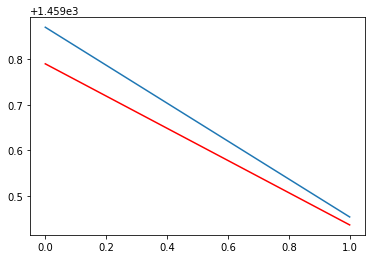

Actual VS Prediction E10
Test Mean absolute deviation: 178.000
Test mean absolute percentage error: 0.134
predicted=1594.562201, expected=1439.454545


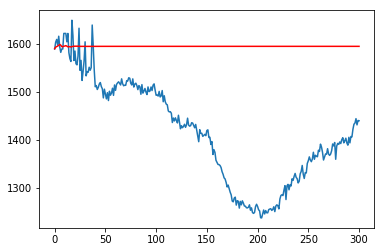

Actual VS Prediction DIESEL
Test Mean absolute deviation: 132.197
Test mean absolute percentage error: 0.116
predicted=1405.000000, expected=1226.727273


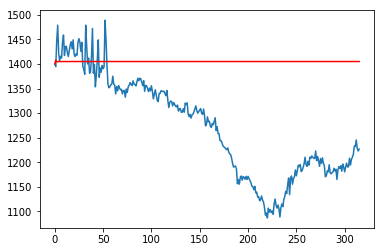

In [125]:
#passing values to data prediction function
data_prediction('E5',317  )
data_prediction('E10', 18)
data_prediction('DIESEL', 3)

In [126]:
training_dfs = np.split(train, np.arange(len(train.columns)), axis=1)
testing_dfs = np.split(test, np.arange(len(test.columns)), axis=1)
training_sets = []

for i,j in enumerate(range(1,4)):
    fuel_type = (training_dfs[j].columns.values.item())
    fuel_copy = training_dfs[j].copy()
    
    fuel_copy.reset_index(level=0, inplace=True)
   
    fuel_copy.columns = ['ds' , 'y']
    training_sets.append(fuel_copy)

# Step 2: Fbprophet analysis

In [127]:
prophets = []
for training_set in training_sets:
    # Create Prophet with seasonality in week, year and half year
    m = Prophet(seasonality_prior_scale=0.1,daily_seasonality=False,
                weekly_seasonality=True,
                yearly_seasonality=True);
    m.fit(training_set)
    prophets.append(m)

C:\Users\HOME\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\HOME\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\Users\HOME\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [128]:
testing_dates = (testing_dfs[0].index.values)
first_day_test = testing_dates[0]
last_day_test = testing_dates[-1]
num_days_to_test = (last_day_test-first_day_test).days

num_days_to_test += 1
futures = []
for prophet in prophets:
    futures.append(m.make_future_dataframe(periods=num_days_to_test))

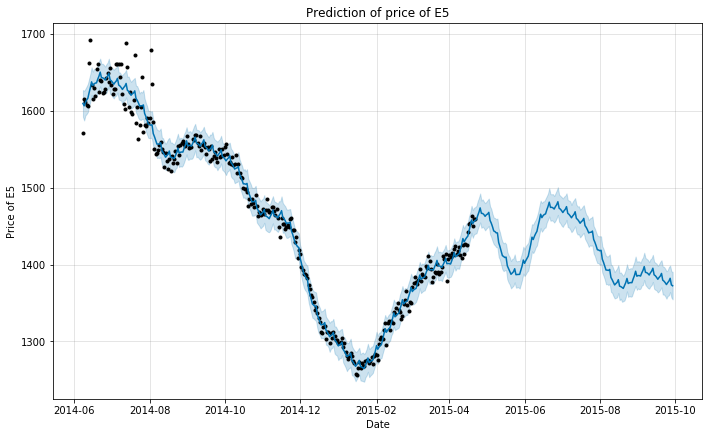

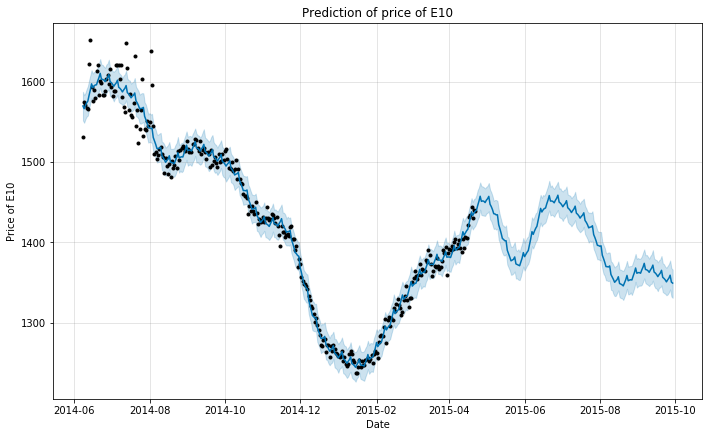

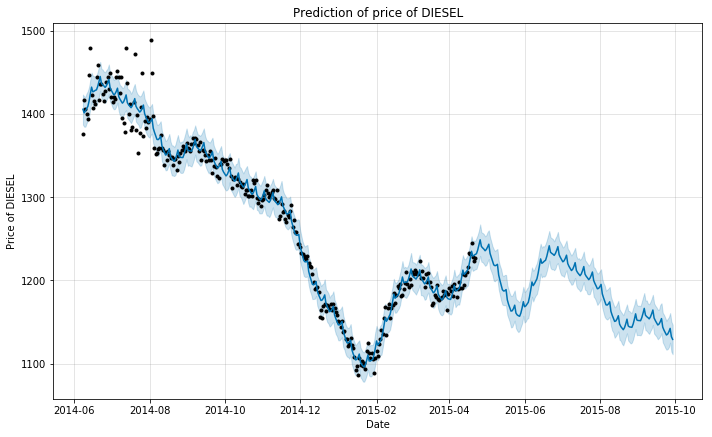

In [141]:
fuels = train.columns

forecasts = []
for fuel,prophet, future in zip(fuels,prophets, futures):
    forecast = prophet.predict(future)
    forecasts.append(forecast[['ds','yhat']])
    #print(forecast)
    g = prophet.plot(forecast)

    plt.title('Prediction of price of '+fuel)
    plt.xlabel('Date')
    plt.ylabel('Price of '+fuel)

In [142]:
forecasts

[            ds         yhat
 0   2014-06-08  1609.752831
 1   2014-06-09  1606.626678
 2   2014-06-10  1610.770161
 3   2014-06-11  1614.009659
 4   2014-06-12  1616.560786
 5   2014-06-13  1623.745101
 6   2014-06-14  1630.088570
 7   2014-06-15  1637.810185
 8   2014-06-16  1632.936333
 9   2014-06-17  1635.111062
 10  2014-06-18  1636.203300
 11  2014-06-19  1636.472617
 12  2014-06-20  1641.285000
 13  2014-06-21  1645.210378
 14  2014-06-22  1650.510336
 15  2014-06-23  1643.251624
 16  2014-06-24  1643.115632
 17  2014-06-25  1642.004895
 18  2014-06-26  1640.208250
 19  2014-06-27  1643.116097
 20  2014-06-28  1645.317545
 21  2014-06-29  1649.087867
 22  2014-06-30  1640.501880
 23  2014-07-01  1639.243427
 24  2014-07-02  1637.212022
 25  2014-07-03  1634.688260
 26  2014-07-04  1637.049467
 27  2014-07-05  1638.867332
 28  2014-07-06  1642.395949
 29  2014-07-07  1633.685867
 ..         ...          ...
 449 2015-08-31  1384.784901
 450 2015-09-01  1385.620920
 451 2015-09-0

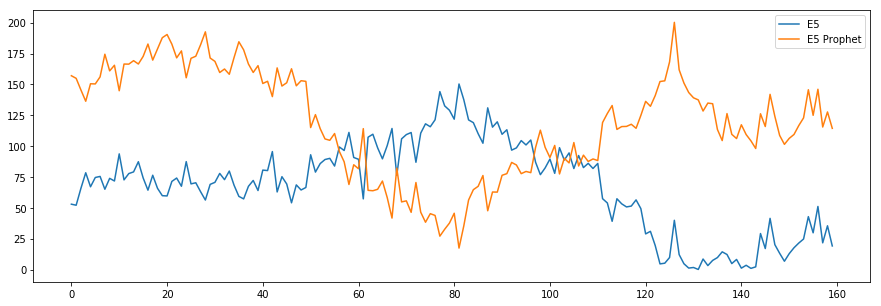

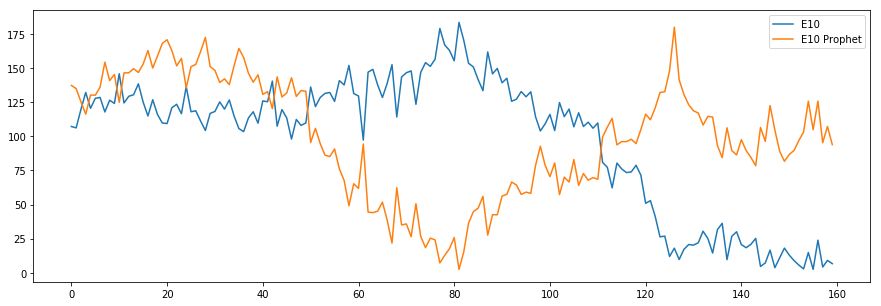

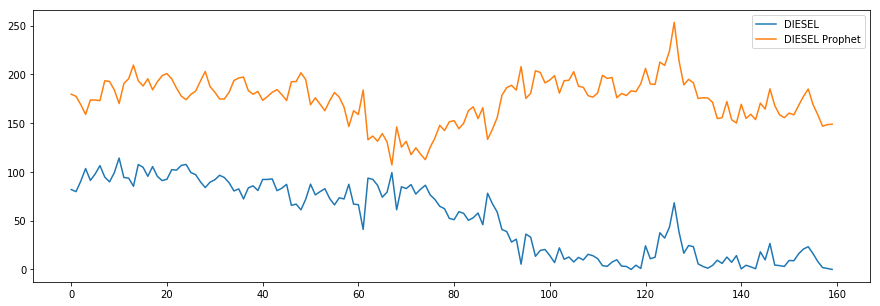

In [143]:
for enum_i, fuel in enumerate(['E5','E10','DIESEL']):
    mad_pairs_list=([[frame[fuel].values[i][0],frame[fuel].values[i][1]] for i in range(len(frame.index.values))])
    mad_list = [mean_abs_deviation(x,y) for x,y in mad_pairs_list]
    
    mad_pairs_prophet= ([[forecasts[enum_i]['yhat'][i],frame[fuel].values[i][1]] for i in range(len(frame.index.values))])
    mad_list_prophet = [mean_abs_deviation(x,y) for x,y in mad_pairs_prophet]
    plt.figure(figsize=(15,5))
    plt.plot(mad_list,label=fuel);
    plt.plot(mad_list_prophet,label=fuel+' Prophet');
    plt.legend()

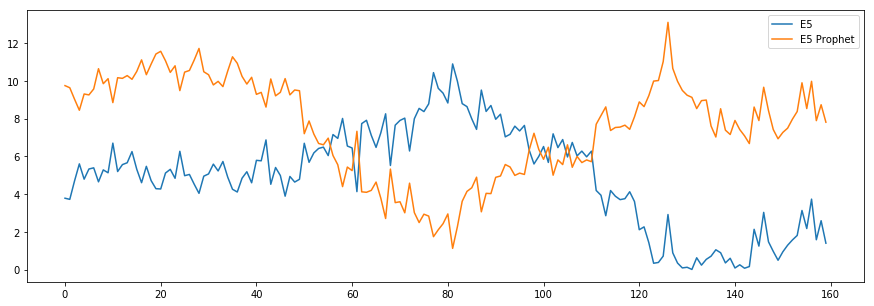

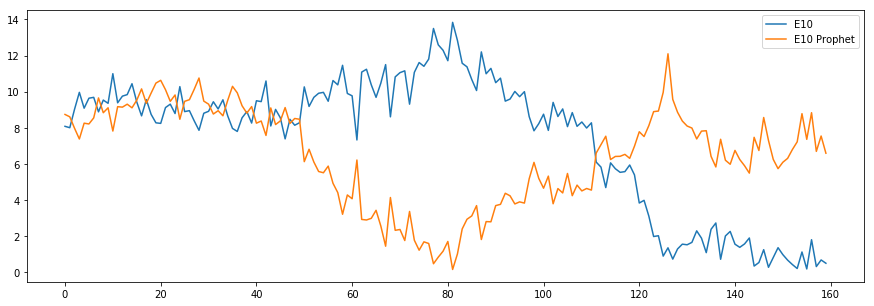

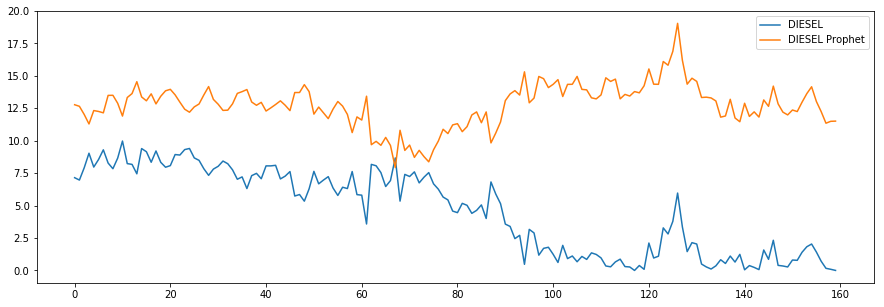

In [144]:
for enum_i, fuel in enumerate(['E5','E10','DIESEL']):
    mape_pairs_list=([[frame[fuel].values[i][0],frame[fuel].values[i][1]] for i in range(len(frame.index.values))])
    mape_list = [mean_absolute_percentage_error(x,y) for x,y in mape_pairs_list]
    
    mape_pairs_prophet= ([[forecasts[enum_i]['yhat'][i],frame[fuel].values[i][1]] for i in range(len(frame.index.values))])
    mape_list_prophet = [mean_absolute_percentage_error(x,y) for x,y in mape_pairs_prophet]
    plt.figure(figsize=(15,5))
    plt.plot(mape_list,label=fuel);
    plt.plot(mape_list_prophet,label=fuel+' Prophet');
    plt.legend()

# Step 3:  comparison on the full 100 data set, ( results for e5, e10 and diesel)

In [162]:
_,test_top_100 = np.split(top_stn_datahistory, [int((2/3)*len(top_stn_datahistory))])

In [163]:
def MA_percentage_error(x,y):
    mape = np.mean(abs((y-x)/y))
    return mape


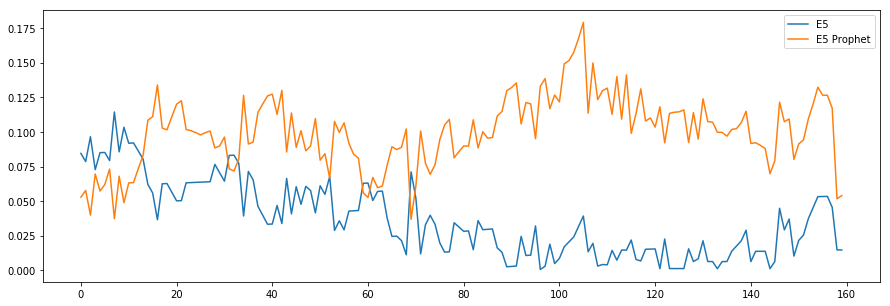

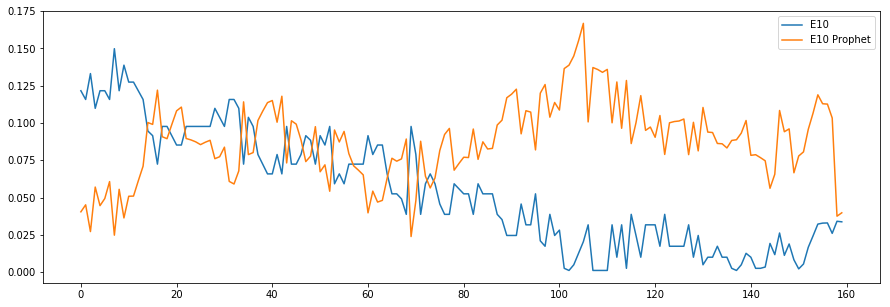

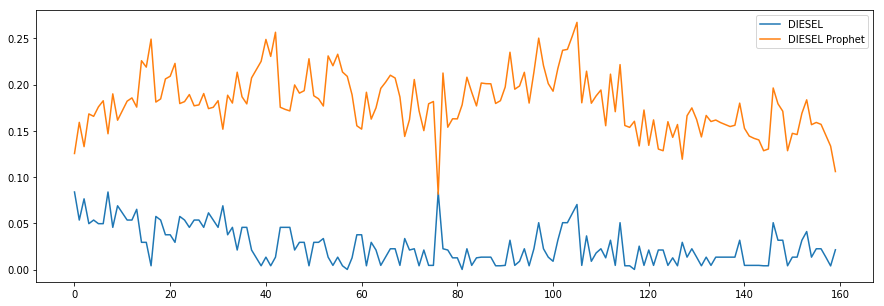

In [172]:
for enum_i, fuel in enumerate(['E5','E10', 'DIESEL']):
    mape_pairs_list=([[frame[fuel].values[i][0],test_top_100[fuel].values[i]] for i in range(len(frame.index.values))])
    mape_list = [MA_percentage_error(x,y) for x,y in mape_pairs_list]
    
    mape_pairs_prophet= ([[forecasts[enum_i]['yhat'][i],test_top_100[fuel][i]] for i in range(len(frame.index.values))])
    mape_list_prophet = [MA_percentage_error(x,y) for x,y in mape_pairs_prophet]
    plt.figure(figsize=(15,5))
    plt.plot(mape_list,label=fuel);
    plt.plot(mape_list_prophet,label=fuel+' Prophet');
    plt.legend()

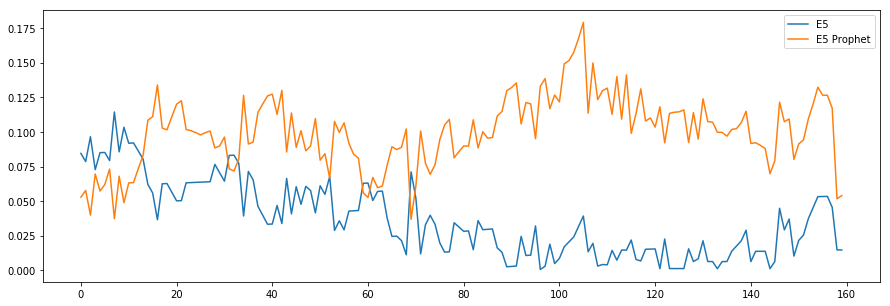

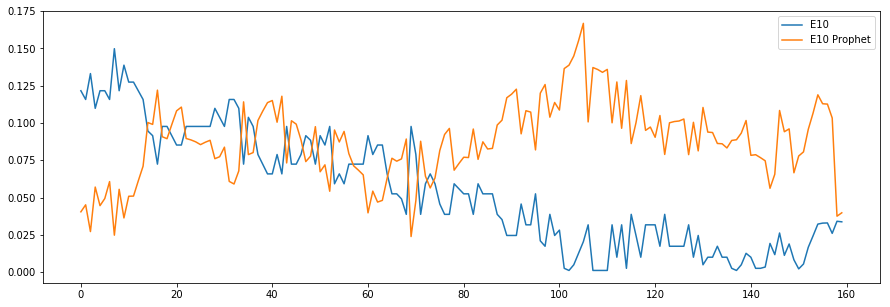

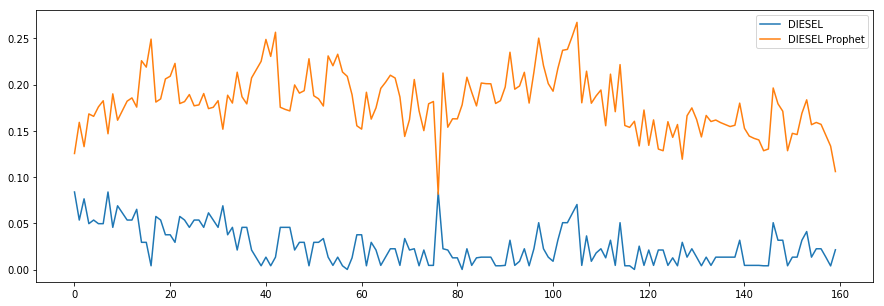

In [169]:
for enum_i, fuel in enumerate(['E5','E10', 'DIESEL']):
    mape_pairs_list=([[frame[fuel].values[i][0],test_top_100[fuel].values[i]] for i in range(len(frame.index.values))])
    mape_list = [MA_percentage_error(x,y) for x,y in mape_pairs_list]
    
    mape_pairs_prophet= ([[forecasts[enum_i]['yhat'][i],test_top_100[fuel][i]] for i in range(len(frame.index.values))])
    mape_list_prophet = [MA_percentage_error(x,y) for x,y in mape_pairs_prophet]
    plt.figure(figsize=(15,5))
    plt.plot(mape_list,label=fuel);
    plt.plot(mape_list_prophet,label=fuel+' Prophet');
    plt.legend()

# Unit tests

In [3]:
import unittest
import pandas as pd

def mean(value_list):
    return sum(value_list)/len(value_list)

def mean_absolute_deviation(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)) 

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100   


class TestMeanAndMetricMethods(unittest.TestCase):
    def test_mean(self):
        d = {'test1': [1, 3, 2, 4, 5, 6], 'test2': [9, 0, 1, 1, -4, 5]}
        df = pd.DataFrame(data=d)
        self.assertEqual(mean(df["test1"]), 3.5)
        self.assertEqual(mean(df["test2"]), 2.0)
    # Test mean_absolute_deviation
    def test_mad(self):
        d = {'test1': [[1,5,2,-1,10,3],[4,6,5,2,-7,-3]], 'test2': [[4,6,5,2,-7,-3],[4,6,-5,2,7,3]]}
        df = pd.DataFrame(data=d)
        self.assertEqual(mean_absolute_deviation(*df["test1"]), 5.5)
        self.assertEqual(mean_absolute_deviation(*df["test2"]), 5)
    # Test mean_absolute_percentage_error
    def test_mape(self):
        d = {'test1': [[1,5,2,-1,10,3],[4,6,5,2,-7,-3]], 'test2': [[4,6,5,2,-7,-3],[4,6,-5,2,7,3]]}
        df = pd.DataFrame(data=d)
        self.assertEqual(mean_absolute_percentage_error(*df["test1"]), 190)
        self.assertEqual(mean_absolute_percentage_error(*df["test2"]), 100)


unittest.main(argv=[''], verbosity=2, exit=False);

test_mad (__main__.TestMeanAndMetricMethods) ... ok
test_mape (__main__.TestMeanAndMetricMethods) ... ok
test_mean (__main__.TestMeanAndMetricMethods) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.023s

OK
